In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math
import scipy.stats
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.api as sms
from scipy.stats import mannwhitneyu

In [13]:
data = pd.read_csv("not_enough_credit_JIF_15.csv")
print(len(data))
data = data.dropna(subset=['white','black','his','asi','oth'])
print(len(data))
data.to_csv("not_enough_credit_JIF_15_no_null_race.csv")

50422
50413


If your alternative hypothesis is p1 > p2, you use the raw value of z

If your alternative hypothesis is p1 < p2, you use the raw value of z

If your alternative hypothesis is p1 != p2, you use the abs(z)

for P1 > p2 or p1 != p2 as alternative, z = (p1 - p2)/se

for P1 < p2 as alternative, z = (p2 - p1)/se

In [14]:
glm_bet = data[data.hits < data.glam]
hit_bet = data[data.hits > data.glam]
ga = glm_bet[glm_bet.asi > 0.50]
gb = glm_bet[glm_bet.black > 0.50]
gw = glm_bet[glm_bet.white > 0.50]
ha = hit_bet[hit_bet.asi > 0.50]
hb = hit_bet[hit_bet.black > 0.50]
hw = hit_bet[hit_bet.white > 0.50]
gh = glm_bet[glm_bet.his > 0.50]
hh = hit_bet[hit_bet.his > 0.50]

In [18]:
#alternative smaller significant
#Calculate the proportion of asian in journal
x1 = len(ha)
n1 = len(hit_bet)
p1 = x1/n1

#Calculate the proportion of asian in article
x2 = len(ga)
n2 = len(glm_bet)
p2 = x2/n2

print("x1 ",x1," n1 ", n1," x2 ",x2," n2 ",n2," p1 ",p1, " p2 ",p2)

#print(p1," ",p2)

#calculate pooled proportion
po = (x1+x2)/(n1+n2)

#Calculate SE
SE = po * (1 - po) * ((1/n1)+(1/n2))
se = math.sqrt(SE)

z = (p2-p1)/se

#p_value = scipy.stats.norm.sf(z)
p_value = scipy.stats.norm.sf(abs(z)) * 2
print("z stat of mine ",z," p value of my calculation ",p_value)
#print(scipy.stats.norm.cdf(z))
#alpha = 0.05

successes = np.array([x1, x2])
samples = np.array([n1, n2])
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
print("statistic ",stat," p val ",p_value)

x1  5244  n1  32868  x2  495  n2  2297  p1  0.15954728002920773  p2  0.21549847627340007
z stat of mine  7.015329857573229  p value of my calculation  2.2940707986015302e-12
statistic  -7.015329857573229  p val  2.2940707986015302e-12


In [19]:
#none is significant
#Calculate the proportion of black in journal
x1 = len(hb)
n1 = len(hit_bet)
p1 = x1/n1

#Calculate the proportion of black in article
x2 = len(gb)
n2 = len(glm_bet)
p2 = x2/n2

print("x1 ",x1," n1 ", n1," x2 ",x2," n2 ",n2," p1 ",p1, " p2 ",p2)

#print(p1," ",p2)

#calculate pooled proportion
po = (x1+x2)/(n1+n2)

#Calculate SE
SE = po * (1 - po) * ((1/n1)+(1/n2))
se = math.sqrt(SE)

z = (p2-p1)/se

#p_value = scipy.stats.norm.sf(z)
p_value = scipy.stats.norm.sf(abs(z)) * 2

print("z stat of mine ",z," p value of my calculation ",p_value)
#print(scipy.stats.norm.cdf(z))
#alpha = 0.05

successes = np.array([x1, x2])
samples = np.array([n1, n2])
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
print("statistic ",stat," p val ",p_value)

x1  319  n1  32868  x2  16  n2  2297  p1  0.009705488621151271  p2  0.006965607313887679
z stat of mine  -1.3069382129951643  p value of my calculation  0.19123369668781054
statistic  1.3069382129951643  p val  0.19123369668781054


In [23]:
#larger significant
#Calculate the proportion of black in journal
x1 = len(hw)
n1 = len(hit_bet)
p1 = x1/n1

#Calculate the proportion of black in article
x2 = len(gw)
n2 = len(glm_bet)
p2 = x2/n2

print("x1 ",x1," n1 ", n1," x2 ",x2," n2 ",n2," p1 ",p1, " p2 ",p2)

#print(p1," ",p2)

#calculate pooled proportion
po = (x1+x2)/(n1+n2)

#Calculate SE
SE = po * (1 - po) * ((1/n1)+(1/n2))
se = math.sqrt(SE)

z = (p1-p2)/se

#p_value = scipy.stats.norm.sf(z)
p_value = scipy.stats.norm.sf(abs(z)) * 2

print("z stat of mine ",z," p value of my calculation ",p_value)
#print(scipy.stats.norm.cdf(z))
#alpha = 0.05

successes = np.array([x1, x2])
samples = np.array([n1, n2])
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
print("statistic ",stat," p val ",p_value)

x1  25713  n1  32868  x2  1687  n2  2297  p1  0.7823110624315444  p2  0.7344362211580322
z stat of mine  5.34790622417364  p value of my calculation  8.897754303782211e-08
statistic  5.34790622417364  p val  8.897754303782211e-08


In [24]:
#nothing is significant
#Calculate the proportion of black in journal
x1 = len(hh)
n1 = len(hit_bet)
p1 = x1/n1

#Calculate the proportion of black in article
x2 = len(gh)
n2 = len(glm_bet)
p2 = x2/n2

print("x1 ",x1," n1 ", n1," x2 ",x2," n2 ",n2," p1 ",p1, " p2 ",p2)

#print(p1," ",p2)

#calculate pooled proportion
po = (x1+x2)/(n1+n2)

#Calculate SE
SE = po * (1 - po) * ((1/n1)+(1/n2))
se = math.sqrt(SE)

z = (p1-p2)/se

#p_value = scipy.stats.norm.sf(z)
p_value = scipy.stats.norm.sf(abs(z)) * 2

print("z stat of mine ",z," p value of my calculation ",p_value)
#print(scipy.stats.norm.cdf(z))
#alpha = 0.05

successes = np.array([x1, x2])
samples = np.array([n1, n2])
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
print("statistic ",stat," p val ",p_value)

x1  1051  n1  32868  x2  65  n2  2297  p1  0.03197639041012535  p2  0.028297779712668697
z stat of mine  0.9723486130102792  p value of my calculation  0.3308771470685642
statistic  0.9723486130102792  p val  0.3308771470685642


### Binomial Test

In [8]:
#greater - significant, but will report 2-sided
total = len(hh) + len(gh)
print(scipy.stats.binom_test(x = [len(hh)],n = total, p = 0.5, alternative = 'two-sided'))

5.439594719904585e-230


In [9]:
#greater - significant
total = len(ha) + len(ga)
print(scipy.stats.binom_test(x = [len(ha)],n = total, p = 0.5, alternative = 'two-sided'))

0.0


In [10]:
#greater - significant
total = len(hb) + len(gb)
print(scipy.stats.binom_test(x = [len(hb)],n = total, p = 0.5, alternative = 'two-sided'))

2.513347480267395e-74


In [11]:
#greater - significant
total = len(hw) + len(gw)
print(scipy.stats.binom_test(x = [len(hw)],n = total, p = 0.5, alternative = 'two-sided'))

5e-324


### KS test in python

In [5]:
def cumulative_sum(input_list):
    # Convert the list to a NumPy array
    input_array = np.array(input_list)
    # Compute the cumulative sum along the first axis of the array
    cumulative_sum_array = np.cumsum(input_array)
    # Convert the NumPy array back to a list and return it
    return cumulative_sum_array.tolist()

2297   2297
4974.155450381866   438.6864826497286
KstestResult(statistic=0.9873748367435786, pvalue=0.0)
MannwhitneyuResult(statistic=5218175.0, pvalue=1.0)


'f1 = random.sample(range(1000), 1000)\nf2 = random.sample(range(10000), 1000)\n\nf1.sort()\nf2.sort()\nprint(sum(f1)/len(f1)," ",sum(f2)/len(f2))\nprint(stats.kstest(f2, f1, alternative = "greater"))\n\nplt.plot(f2, color = "red")\nplt.plot(f1, color = "black")'

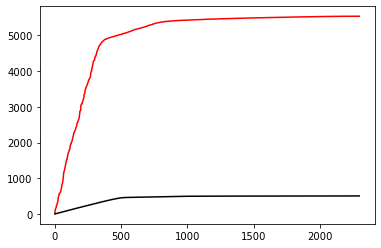

In [10]:
glm_bet = data[data.hits < data.glam]
hit_bet = data[data.hits > data.glam]

y1 = list(glm_bet['asi'])
x1 = list(hit_bet['asi'])

x1.sort(reverse = True)
y1.sort(reverse = True)

x2 = cumulative_sum(x1)
y2 = cumulative_sum(y1)

random_indices = random.sample(range(len(x2)), len(y2))

x3 = [x2[i] for i in random_indices]

x3.sort()

print(len(x3)," ",len(y2))

print(sum(x3)/len(x3)," ",sum(y2)/len(y2))

a = stats.kstest(x3, y2, alternative = "less")
#a = stats.ks_2samp(x3, y2, alternative = "less")
print(a)

print(mannwhitneyu(x3,y2,alternative = "less"))

plt.plot(x3, color = "red")
plt.plot(y2, color = "black")

'''f1 = random.sample(range(1000), 1000)
f2 = random.sample(range(10000), 1000)

f1.sort()
f2.sort()
print(sum(f1)/len(f1)," ",sum(f2)/len(f2))
print(stats.kstest(f2, f1, alternative = "greater"))

plt.plot(f2, color = "red")
plt.plot(f1, color = "black")'''

In [17]:
def cumulative_sum(input_list):
    # Convert the list to a NumPy array
    input_array = np.array(input_list)
    # Compute the cumulative sum along the first axis of the array
    cumulative_sum_array = np.cumsum(input_array)
    # Convert the NumPy array back to a list and return it
    return cumulative_sum_array.tolist()

a = [5,4,3,2,1]
b = cumulative_sum(a)
print(b)

[5, 9, 12, 14, 15]


In [7]:
import random

# Your list
your_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Number of random indices to generate
n = 5

# Generate random indices
random_indices = random.sample(range(len(your_list)), n)

# Extract values at random indices
random_values = [your_list[i] for i in random_indices]

print("Random Indices:", random_indices)
print("Random Values:", random_values)


Random Indices: [8, 0, 4, 3, 5]
Random Values: [90, 10, 50, 40, 60]


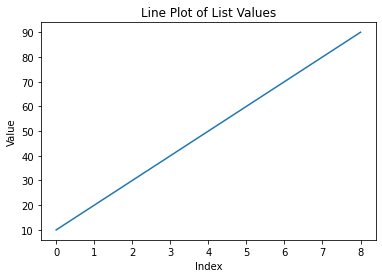

In [36]:
import matplotlib.pyplot as plt

# Your list (replace with your actual data)
your_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Plotting
plt.plot(your_list)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of List Values')

# Display the plot
plt.show()


In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
#Binomial test - read through the documentation